이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 784)

In [4]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

뒤의 784개 자료는 무의미한 자료

In [6]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 8ms/step - loss: 0.6091 - accuracy: 0.8146 - val_loss: 0.2856 - val_accuracy: 0.9107
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2471 - accuracy: 0.9243 - val_loss: 0.2217 - val_accuracy: 0.9340
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1618 - accuracy: 0.9505 - val_loss: 0.1592 - val_accuracy: 0.9524
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.9633 - val_loss: 0.1756 - val_accuracy: 0.9458
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0859 - accuracy: 0.9734 - val_loss: 0.1270 - val_accuracy: 0.9628
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.1329 - val_accuracy: 0.9622
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.1446 - val_accuracy: 0.9600
Epoch

**검증 정확도 비교 그래프 그리기**

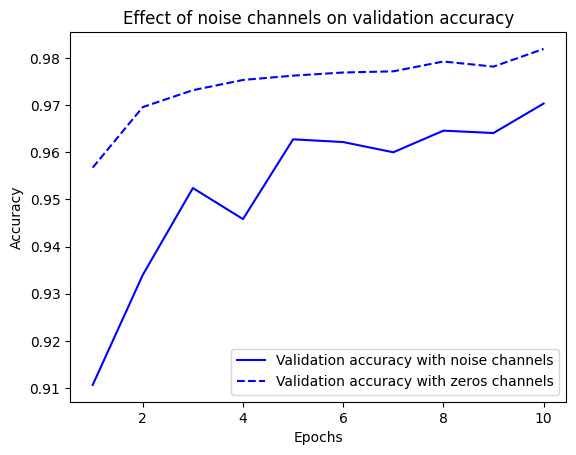

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

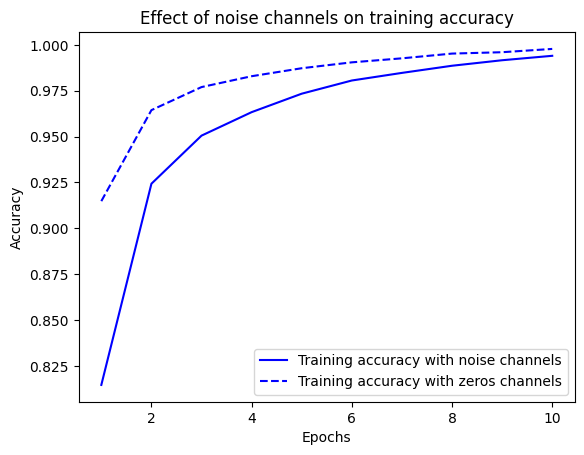

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["accuracy"]
val_acc_zeros = history_zeros.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Training accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Training accuracy with zeros channels")
plt.title("Effect of noise channels on training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:].copy()
np.random.shuffle(random_train_labels)

In [11]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
random_train_labels[:10]

array([0, 3, 4, 9, 9, 9, 8, 7, 0, 8], dtype=uint8)

셔플시킨 라벨을 이용하여 train하기 위한 목적

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3151 - accuracy: 0.1010 - val_loss: 2.3053 - val_accuracy: 0.1017
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2992 - accuracy: 0.1158 - val_loss: 2.3113 - val_accuracy: 0.1025
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2915 - accuracy: 0.1256 - val_loss: 2.3183 - val_accuracy: 0.1023
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2795 - accuracy: 0.1387 - val_loss: 2.3312 - val_accuracy: 0.1023
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2648 - accuracy: 0.1485 - val_loss: 2.3403 - val_accuracy: 0.0957
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2461 - accuracy: 0.1637 - val_loss: 2.3469 - val_accuracy: 0.1007
Epoch 7/100
343/375 [==========================>...] - ETA: 0s - loss: 2.2224 - accuracy: 0.1791

KeyboardInterrupt: ignored

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 934.4771 - accuracy: 0.3451 - val_loss: 2.1439 - val_accuracy: 0.2370
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7634 - accuracy: 0.1962 - val_loss: 15.7667 - val_accuracy: 0.2801
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7066 - accuracy: 0.1770 - val_loss: 2.2997 - val_accuracy: 0.1881
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4856 - accuracy: 0.1800 - val_loss: 2.3040 - val_accuracy: 0.1612
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3406 - accuracy: 0.1852 - val_loss: 2.3307 - val_accuracy: 0.1687
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3312 - accuracy: 0.1717 - val_loss: 2.2614 - val_accuracy: 0.1887
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4836 - accuracy: 0.1886 - val_loss: 2.1283 - val_accuracy: 0.1792
Epo

**같은 모델을 적절한 학습률로 훈련하기**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3400 - accuracy: 0.9122 - val_loss: 0.1751 - val_accuracy: 0.9482
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9659 - val_loss: 0.1355 - val_accuracy: 0.9637
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9746 - val_loss: 0.1747 - val_accuracy: 0.9619
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9781 - val_loss: 0.1407 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9830 - val_loss: 0.1868 - val_accuracy: 0.9648
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9852 - val_loss: 0.2035 - val_accuracy: 0.9697
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 0.1851 - val_accuracy: 0.9705
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

덴스 레이어 하나만 둔 가장 단순한 모형

In [16]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6721 - accuracy: 0.8358 - val_loss: 0.3615 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.9030 - val_loss: 0.3107 - val_accuracy: 0.9150
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9115 - val_loss: 0.2931 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3012 - accuracy: 0.9155 - val_loss: 0.2861 - val_accuracy: 0.9207
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9179 - val_loss: 0.2790 - val_accuracy: 0.9220
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9201 - val_loss: 0.2746 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.9215 - val_loss: 0.2718 - val_accuracy: 0.9257
Epoch 

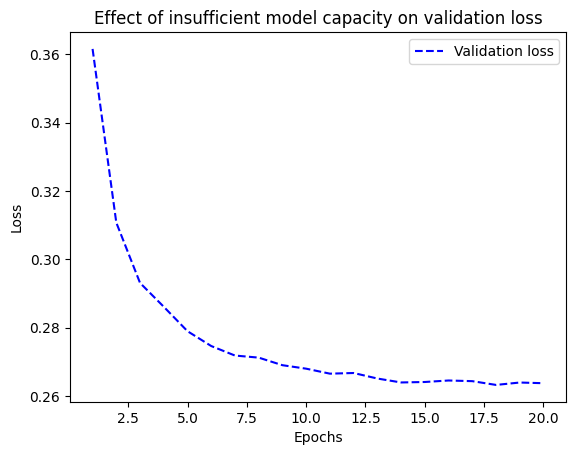

In [17]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

좀 더 오버피팅한 모델

In [18]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3721 - accuracy: 0.8956 - val_loss: 0.1957 - val_accuracy: 0.9447
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9534 - val_loss: 0.1395 - val_accuracy: 0.9588
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9668 - val_loss: 0.1173 - val_accuracy: 0.9637
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 0.0960 - val_accuracy: 0.9714
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.0887 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0923 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.1003 - val_accuracy: 0.9728
Epoch 

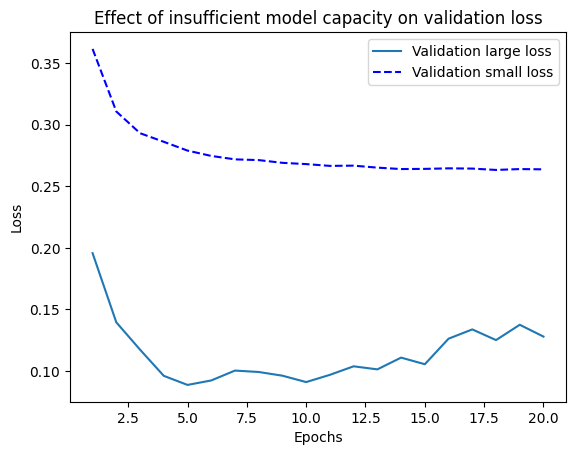

In [24]:
val_loss1 = history_large_model.history["val_loss"]
val_loss2 = history_small_model.history["val_loss"]

epochs = range(1, 21)

plt.plot(epochs, val_loss1, 
         label="Validation large loss")
plt.plot(epochs, val_loss2, "b--",
         label="Validation small loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5507 - accuracy: 0.7629 - val_loss: 0.4196 - val_accuracy: 0.8608
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3428 - accuracy: 0.8878 - val_loss: 0.3290 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2536 - accuracy: 0.9138 - val_loss: 0.2849 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2079 - accuracy: 0.9282 - val_loss: 0.2811 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1740 - accuracy: 0.9413 - val_loss: 0.2752 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1460 - accuracy: 0.9542 - val_loss: 0.2845 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1278 - accurac

**작은 용량의 모델**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6537 - accuracy: 0.7071 - val_loss: 0.6125 - val_accuracy: 0.8210
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5711 - accuracy: 0.8426 - val_loss: 0.5356 - val_accuracy: 0.8468
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4909 - accuracy: 0.8659 - val_loss: 0.4694 - val_accuracy: 0.8482
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4213 - accuracy: 0.8770 - val_loss: 0.4128 - val_accuracy: 0.8624
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3645 - accuracy: 0.8893 - val_loss: 0.3688 - val_accuracy: 0.8729
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3188 - accuracy: 0.8985 - val_loss: 0.3381 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2822 - accuracy: 0.9083 - val_loss: 0.3153 - val_accuracy: 0.8804
Epoch 8/20
30

**큰 용량의 모델**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5716 - accuracy: 0.7137 - val_loss: 0.3488 - val_accuracy: 0.8635
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3209 - accuracy: 0.8687 - val_loss: 0.3349 - val_accuracy: 0.8619
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2462 - accuracy: 0.8993 - val_loss: 0.2753 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1797 - accuracy: 0.9305 - val_loss: 0.2731 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1404 - accuracy: 0.9453 - val_loss: 0.3603 - val_accuracy: 0.8626
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1027 - accuracy: 0.9650 - val_loss: 0.4388 - val_accuracy: 0.8639
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0917 - accuracy: 0.9663 - val_loss: 0.3315 - val_accuracy: 0.8848
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [28]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6101 - accuracy: 0.7792 - val_loss: 0.4778 - val_accuracy: 0.8597
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4054 - accuracy: 0.8881 - val_loss: 0.3956 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3310 - accuracy: 0.9126 - val_loss: 0.3650 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2916 - accuracy: 0.9268 - val_loss: 0.3562 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2698 - accuracy: 0.9354 - val_loss: 0.3625 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2563 - accuracy: 0.9392 - val_loss: 0.3640 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2455 - accuracy: 0.9422 - val_loss: 0.3989 - val_accuracy: 0.8704
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [29]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6313 - accuracy: 0.6369 - val_loss: 0.5166 - val_accuracy: 0.8355
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5170 - accuracy: 0.7427 - val_loss: 0.4177 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4355 - accuracy: 0.8106 - val_loss: 0.3812 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3811 - accuracy: 0.8600 - val_loss: 0.3245 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3335 - accuracy: 0.8884 - val_loss: 0.3369 - val_accuracy: 0.8773
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2949 - accuracy: 0.9113 - val_loss: 0.2975 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2694 - accuracy: 0.9212 - val_loss: 0.3215 - val_accuracy: 0.8834
Epoch 8/20
30

## 요약